In [1]:
'''Goal: Investigate top-paying roles in the data sceince industry, use insights to help find the best job oppurtunities
Country : India , Role : Data Science'''

"""Part a : Exploratory Data Anaysis
We analyse job locations, comapnies and also do some benefit analysis of jobs """
# Importing all the required libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns 
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Filter 
df_DS_IN = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'India')]
df_DS_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']}
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']}
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']}
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['..."


In [10]:
df_plot = df_DS_IN['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
"Bengaluru, Karnataka, India",3465
India,1602
"Hyderabad, Telangana, India",1218
Anywhere,1031
"Mumbai, Maharashtra, India",920
"Pune, Maharashtra, India",917
"Chennai, Tamil Nadu, India",857
"Gurugram, Haryana, India",699
"New Delhi, Delhi, India",508


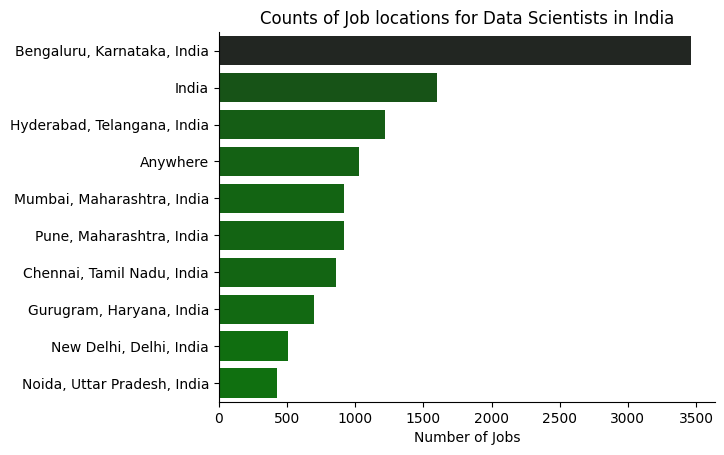

In [11]:
# sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y='job_location', hue='count', palette='dark:g_r',legend=False)
sns.despine()
plt.title('Counts of Job locations for Data Scientists in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

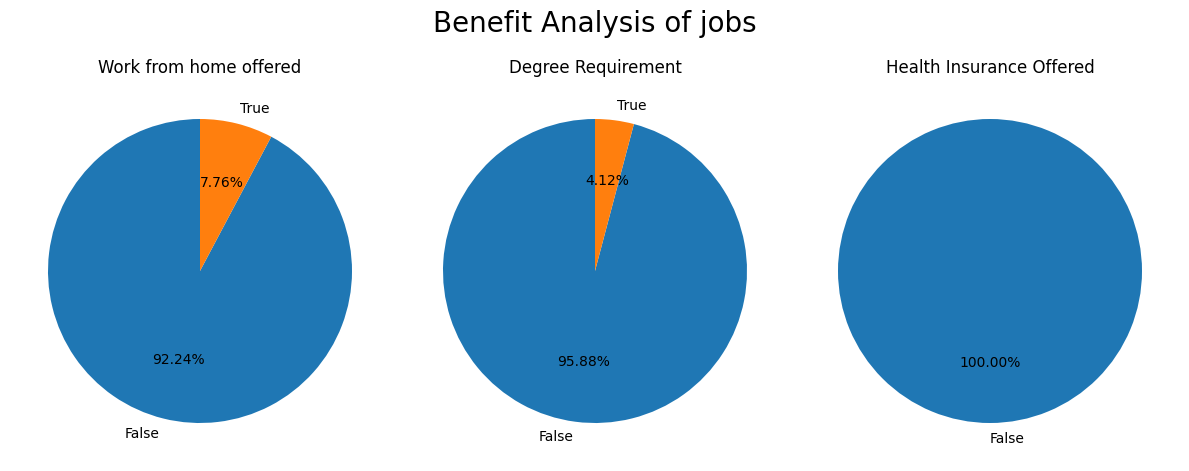

In [12]:
dict_column = {
    'job_work_from_home':'Work from home offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

for i,(column,title) in enumerate(dict_column.items()):
    df_DS_IN[column].value_counts().plot(kind='pie',ax=ax[i],startangle=90,autopct='%1.2f%%')
    ax[i].set_title(title)
    ax[i].set_ylabel('')

plt.suptitle('Benefit Analysis of jobs', fontsize=20)
fig.tight_layout()
plt.show()

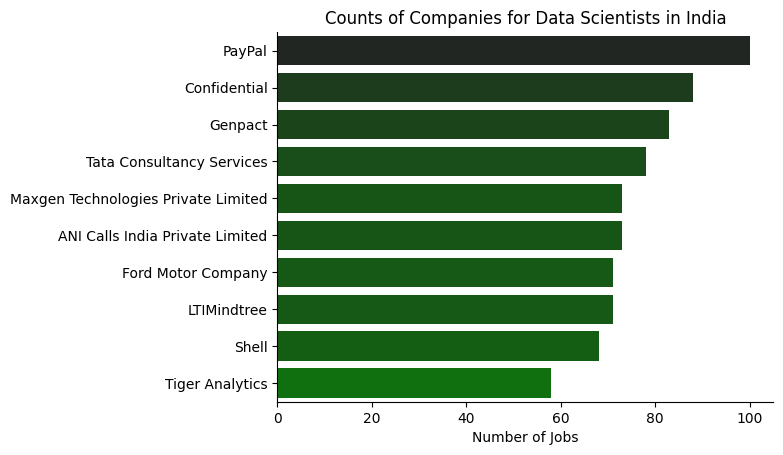

In [14]:
df_plot = df_DS_IN['company_name'].value_counts().head(10).to_frame()
sns.barplot(data = df_plot, x='count', y='company_name', hue='count', palette='dark:g_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Scientists in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()